<a href="https://colab.research.google.com/github/Snehal-Kane/ICG-Computer-Vision-using-Tensorflow/blob/main/Copy_of_CV_with_TF_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [32]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
var1=5
X, y = datasets.make_regression(n_samples=100, n_features=var1, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(len(X_train))
print(len(y_train))

80
80


### Visualizing the data  
Use `matplotlib` to visualize the given data.

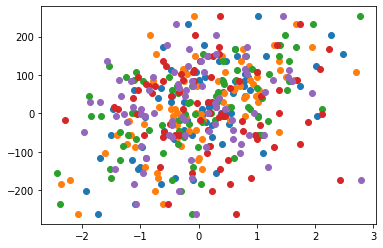

In [33]:
import matplotlib.pyplot as plt
import numpy as np
# Your code here

for i in range (var1):
  x_plt=X_train[:,i]
  y_plt=y_train
  plt.scatter(x_plt,y_plt)
plt.show()



You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [43]:
import numpy as np

class LinearRegression:
  w = 1
  b = 0
  l_r = 0.001
  n = 1000
  n_features=1

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
  def __init__(self,n_features=1, learning_rate=0.001, n_iters=1000):
        # Your code here
      self.w=[]
      for i in range(n_features):
        self.w.append(1)
      self.b=0
      self.l_r=learning_rate
      self.n=n_iters
      self.n_features=n_features
      
        #pass  # Uncomment this when you're done with this function


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    
  def fit(self, X, y):
        # Gradient Descent code goes here
       for m in range(self.n):
        w_diff=[]
        for k in range(self.n_features):
            w_diff.append(0)
        b_diff=0

        for i in range(len(X)):
            yPred=self.b
            for p in range (self.n_features):
                yPred += self.w[p] * X[i,p]

            b_diff += (2 / len(X)) * (-y[i]+yPred)
            for p in range (self.n_features):
                w_diff[p] += (2 / len(X)) * (X[i,p]*yPred - X[i,p]*y[i])
            

        for p in range(self.n_features):
            self.w[p] = self.w[p] - self.l_r * w_diff[p]
        self.b = self.b - self.l_r * b_diff
        #pass  # Uncomment this when you're done with this function
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    
  def predict(self, X):
       # Code goes here
      li=[]
      for i in range (len(X)):
        yPred=self.b
        for p in range (self.n_features):
                yPred += self.w[p] * X[i,p]
          
      
        li.append(yPred) 
      return li
       

        #pass  # Uncomment this when you're done with this function

### Initializing, Training & Predictions

In [44]:
# Now, we make an object of our custom class.
regressor = LinearRegression(5,n_iters=1000) # You may pass the custom parameters or let the default values take it ahead
  
# Call the fit method on the object to train (pass appropriate part of dataset)
regressor.fit(X_train,y_train)

# Now, let's see our what our model predicts
predictions =   regressor.predict(X_test) # pass appropriate part of dataset

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [36]:
def mean_squared_error(y_true, y_pred):
  mse=0
  for i in range (len(y_pred)):
    mse+=(1/len(y_pred))*((y_true[i]-y_pred[i])**2)
  return mse
       # return the mean squared error
       ##pass  # Uncomment this when you're done with this function


def r2_score(y_true, y_pred):
  yAvg=np.average(y_true)
  numr=0
  denr=0
  for i in range(len(y_pred)):
    numr+=((y_true[i]-y_pred[i])**2)
    denr+=((y_true[i]-yAvg)**2)
  r2=1-(numr/denr) 

  return r2   
      # return the r2 score
      #pass  # Uncomment this when you're done with this function
          

mse = mean_squared_error(y_test,predictions) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test,predictions) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 649.6589492270382
Accuracy: 0.938582027146336
